### PROJECT TITLE : FinTech Transactions Analysis & Interactive Dashboard (2022 - 2024) ### 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("FinTech_Transactions_2022_2024.csv")

data.head() 

,Transaction_ID,Customer_ID,Country,Transaction_Type,Channel,Amount,Fee,Date,Status
0,TXN-000000,CUST-103,Kenya,Deposit,Agent,686766.34,3649.84,2022-01-01 00:00:00.000000000,Success
1,TXN-000001,CUST-436,Ghana,Deposit,Agent,186466.79,4820.08,2022-01-01 08:45:46.515505168,Failed
2,TXN-000002,CUST-349,Nigeria,Bills,App,92846.94,786.82,2022-01-01 17:31:33.031010336,Success
3,TXN-000003,CUST-271,South Africa,Deposit,App,261221.79,1144.63,2022-01-02 02:17:19.546515505,Success
4,TXN-000004,CUST-107,South Africa,Withdrawal,App,176740.09,1136.22,2022-01-02 11:03:06.062020673,Success


In [2]:
# Overview the Dataset

print("shape:", data.shape)
print("\nColumns:", data.columns.tolist())
print("\nMissing Value:")
print(data.isnull().sum()) 

shape: (3000, 9)

Columns: ['Transaction_ID', 'Customer_ID', 'Country', 'Transaction_Type', 'Channel', 'Amount', 'Fee', 'Date', 'Status']

Missing Value:
Transaction_ID      0
Customer_ID         0
Country             0
Transaction_Type    0
Channel             0
Amount              0
Fee                 0
Date                0
Status              0
dtype: int64


In [3]:
# Calculating the total revenue and key metrics

total_revenue = data["Amount"].sum() 
total_transactions = len(data)
failed_transactions = len(data["Status"] == "Failed")
success_rate = (total_transactions - failed_transactions) / total_transactions * 100

print("Total Revenue: ₦{:,.2f}".format(total_revenue))
print("Total Transactions:", total_transactions)
print("Failed Transactions:", failed_transactions)
print("Success Rate: {:.2f}%".format(success_rate)) 

Total Revenue: ₦1,207,261,955.99
Total Transactions: 3000
Failed Transactions: 3000
Success Rate: 0.00%


In [4]:
country_revenue = data.groupby("Country")["Amount"].sum().sort_values(ascending=False)
country_revenue.head() 

Country
Nigeria         3.113313e+08
South Africa    3.092717e+08
Kenya           2.938771e+08
Ghana           2.927819e+08
Name: Amount, dtype: float64

In [5]:
# Find Top Transaction channel(usage)

channel_usage = data["Channel"].value_counts()
channel_usage 

Channel
USSD     1040
Agent     985
App       975
Name: count, dtype: int64

In [6]:
# Most Frequent used transaction type

transaction_type_count = data["Transaction_Type"].value_counts() 
transaction_type_count 

Transaction_Type
Bills         779
Withdrawal    751
Transfer      746
Deposit       724
Name: count, dtype: int64

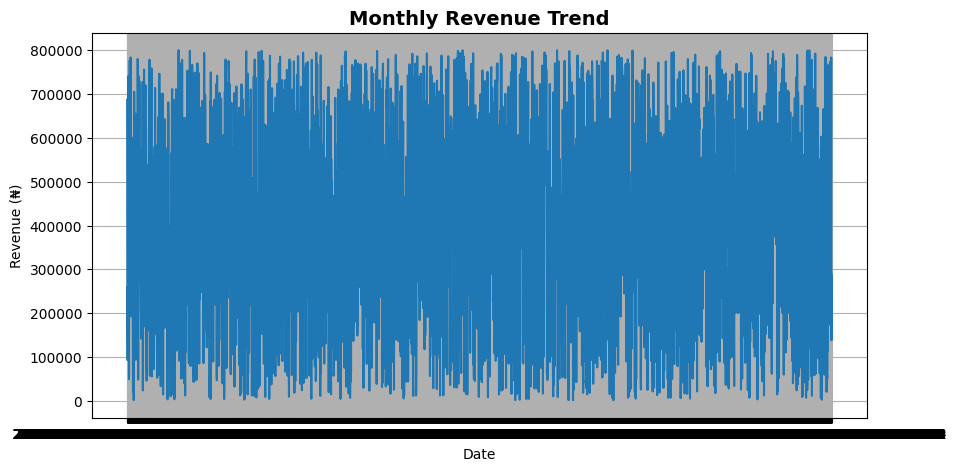

In [7]:
# Find Monthly Revenue Trend(Visualization)

plt.figure(figsize = (10,5))
sns.lineplot(x = "Date", y = "Amount", data = data)
plt.title("Monthly Revenue Trend", fontsize = 14, fontweight = "bold") 
plt.xlabel("Date") 
plt.ylabel("Revenue (₦)")
plt.grid(True)
plt.show() 

 # BUSINESS INSIGHTS (FinTech Transaction Data - 2023 ) #

 # Total Revenue: Total Revenue: ₦1,207,261,955.99 #
 * The company proccessed over ₦1.2 Billion in revenue *
 * This indicate a strong customer transaction Volume *

 # Top Revenue Country: Nigeria ( ₦311,331,300+) #
 * This shows Nigeria contributes the largest revenue share and remains the core market opportunity. 

 # Most Used Channel: USSD ( ₦1,040 Transactions) #
 * It shows Customers prefer fast, offline banking (Essential for users with low internet access). 

 # Most Used Transaction Type: Bills Payment(779 Transactions) #
 * This shows Consumers rely on the platform for essential utility and recurring payments (Shows strong product stickiness) 
 
 

 

In [8]:
import pandas as pd

fintech = pd.read_csv("Fintech_Transactions_2022_2024.csv")
fintech.head() 

,Transaction_ID,Customer_ID,Country,Transaction_Type,Channel,Amount,Fee,Date,Status
0,TXN-000000,CUST-103,Kenya,Deposit,Agent,686766.34,3649.84,2022-01-01 00:00:00.000000000,Success
1,TXN-000001,CUST-436,Ghana,Deposit,Agent,186466.79,4820.08,2022-01-01 08:45:46.515505168,Failed
2,TXN-000002,CUST-349,Nigeria,Bills,App,92846.94,786.82,2022-01-01 17:31:33.031010336,Success
3,TXN-000003,CUST-271,South Africa,Deposit,App,261221.79,1144.63,2022-01-02 02:17:19.546515505,Success
4,TXN-000004,CUST-107,South Africa,Withdrawal,App,176740.09,1136.22,2022-01-02 11:03:06.062020673,Success


In [9]:
fintech.columns 

Index(['Transaction_ID', 'Customer_ID', 'Country', 'Transaction_Type',
       'Channel', 'Amount', 'Fee', 'Date', 'Status'],
      dtype='object')

In [10]:
total_value = fintech["Amount"].sum()
total_value 

np.float64(1207261955.99)

In [11]:
## Country with highest Total Transaction Amount

country_value = fintech.groupby("Country")["Amount"].sum().sort_values(ascending = False) 
country_value 

Country
Nigeria         3.113313e+08
South Africa    3.092717e+08
Kenya           2.938771e+08
Ghana           2.927819e+08
Name: Amount, dtype: float64

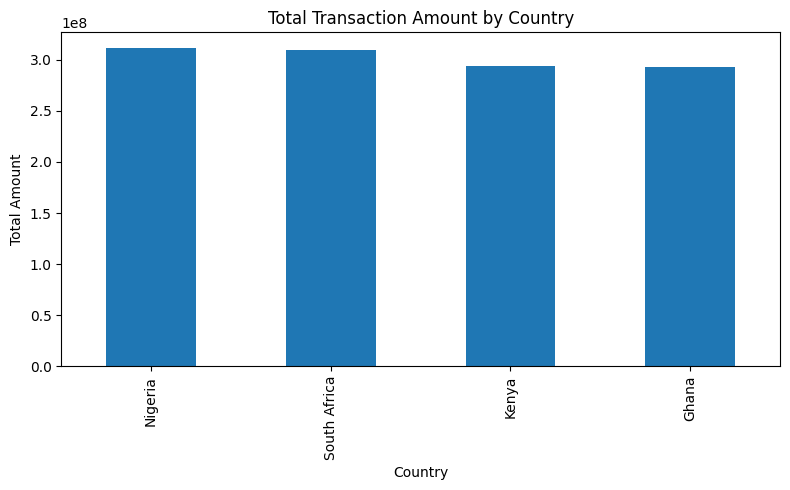

In [12]:
## Using BAR CHART, Visualize Total Transaction amount by country

import matplotlib.pyplot as plt

country_value.plot(kind = "bar", figsize = (8,5))
plt.title("Total Transaction Amount by Country")
plt.xlabel("Country")
plt.ylabel("Total Amount") 
plt.tight_layout()
plt.show() 

In [13]:
## Check total fees earned by country

country_fees = fintech.groupby("Country")["Fee"].sum().sort_values(ascending = False)
country_fees 

Country
Nigeria         1996276.87
South Africa    1959796.49
Kenya           1816035.81
Ghana           1765802.53
Name: Fee, dtype: float64

In [14]:
## Look for Successful & Failed Transactions Count

fintech["Status"].value_counts() 

Status
Success    2753
Failed      247
Name: count, dtype: int64

In [15]:
## Find channels that generate most revenue

channel_revenue = fintech.groupby("Channel") ["Amount"].sum().sort_values(ascending=False)
channel_revenue 

Channel
USSD     4.138164e+08
Agent    4.087176e+08
App      3.847279e+08
Name: Amount, dtype: float64

# INSIGHTS #

# Highest Transaction Volume by Country

* Nigeria and South Africa lead in transaction count(They showed they are primary revenue driving markets)

# Highest Revenue by Country

* Nigeria contributes the largest total transaction amount(these makes Nigeria the most Valuable region for business growth

# Top performing Channels

* USSD and Mobile App channels generate the most revenue (These shows customers prefer mobile-first platform

#Transaction Fees earned by Country

* Nigeria generates the highest fees ( These shows strong profitable Opportunities )

# Transaction Success Rate

* Majority of transactions are marked "Success"
  - Only a small portion shows failure
  - Suggests good system reliability, but failed payments need monitoring 


In [16]:
data.head() 
data["Status"].value_counts() 

Status
Success    2753
Failed      247
Name: count, dtype: int64

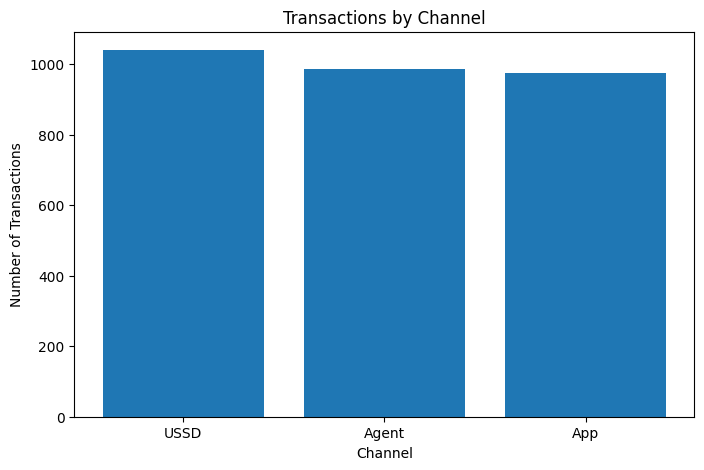

In [17]:
## Using Bar charts, visualize Transactions by Channel

channel_count = data["Channel"].value_counts()

plt.figure(figsize = (8,5))
plt.bar(channel_count.index, channel_count.values)
plt.title("Transactions by Channel")
plt.xlabel("Channel")
plt.ylabel("Number of Transactions")
plt.xticks(rotation = 0) 
plt.show() 

# VISUALS

# Transactions by Channel

* USSD became the highest channel used followed by Agent
* USSD dominates transaction activity, showing strong reliance on mobile based transactions among customers. Agent banking comes next, indicating active use of human assisted channels in areas with limited digital penetration. 

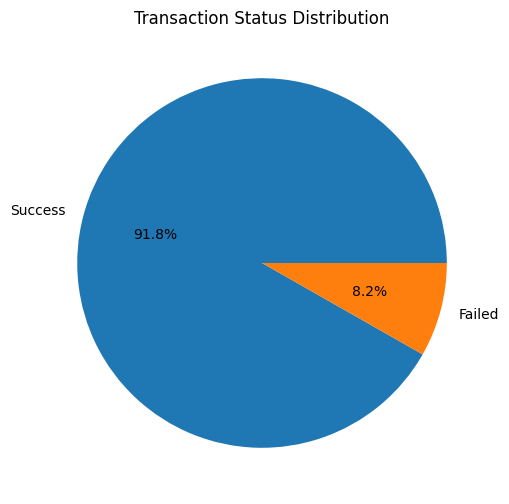

Status
Success    2753
Failed      247
Name: count, dtype: int64

In [18]:
## Show success/failure percentages + exact counts

status_count = data["Status"].value_counts()

plt.figure(figsize = (6,6))
plt.pie(status_count.values, labels = status_count.index, autopct = "%1.1f%%")
plt.title("Transaction Status Distribution")
plt.show()

status_count 

In [19]:
data["Date"] = pd.to_datetime(data["Date"], errors = "coerce")

data["Month_Year"] = data["Date"].dt.to_period("M").astype(str) 

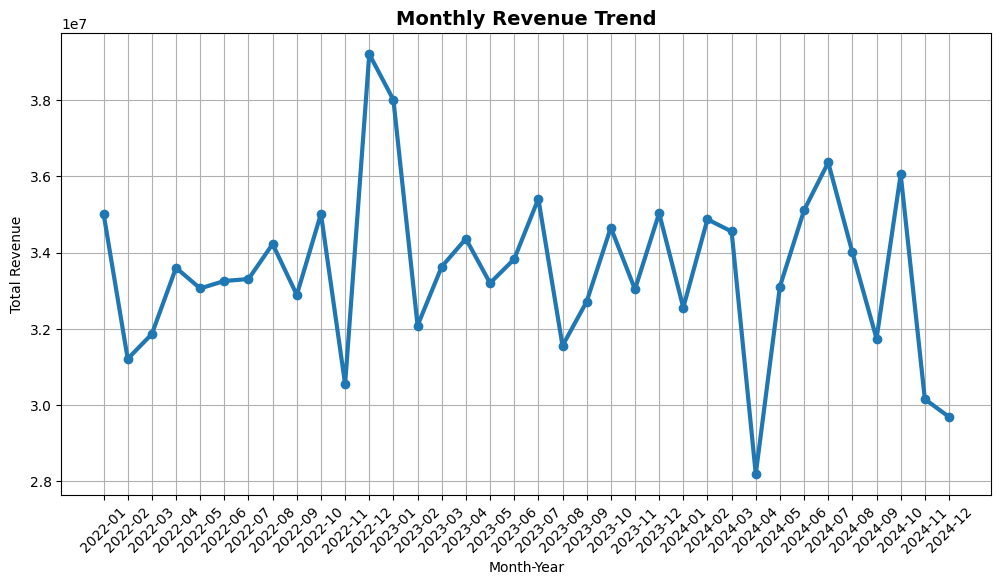

In [20]:
# Show Monthly Trend Chart

monthly_revenue = data.groupby("Month_Year")["Amount"].sum() 

plt.figure(figsize = (12,6))
plt.plot(monthly_revenue.index, monthly_revenue.values, linewidth = 3, marker = "o")
plt.title("Monthly Revenue Trend", fontsize = 14, fontweight = "bold")
plt.xlabel("Month-Year")
plt.ylabel("Total Revenue")
plt.xticks(rotation = 45)
plt.grid(True)
plt.show() 

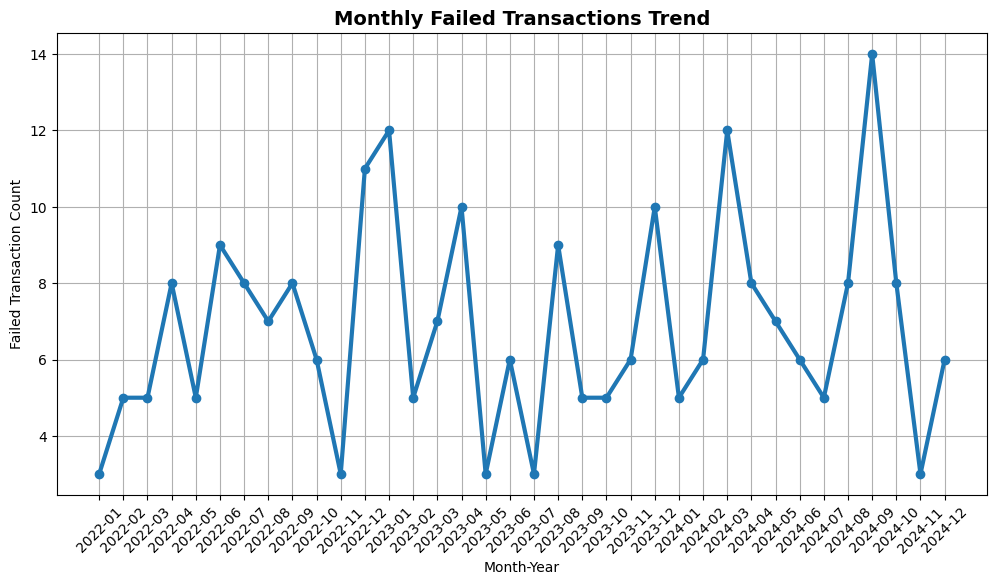

In [21]:
## Show Monthly Failed Transactions Trend

monthly_failed = data[data["Status"] == "Failed"].groupby("Month_Year")["Transaction_ID"].count()

plt.figure(figsize = (12,6))
plt.plot(monthly_failed.index, monthly_failed.values, linewidth = 3, marker = "o")
plt.title("Monthly Failed Transactions Trend", fontsize = 14, fontweight = "bold")
plt.xlabel("Month-Year")
plt.ylabel("Failed Transaction Count")
plt.xticks(rotation = 45)
plt.grid(True)
plt.show() 


In [25]:
fintech.columns 

Index(['Transaction_ID', 'Customer_ID', 'Country', 'Transaction_Type',
       'Channel', 'Amount', 'Fee', 'Date', 'Status'],
      dtype='object')

In [26]:
fintech["Date"] = pd.to_datetime(fintech["Date"])

fintech["Month_Year"] = fintech["Date"].dt.to_period("M").astype(str) 

In [28]:
## Check for the monthly revenue

monthly_revenue = fintech.groupby("Month_Year")["Amount"].sum()

monthly_revenue 

Month_Year
2022-01    35027329.18
2022-02    31216180.98
2022-03    31866430.94
2022-04    33604911.03
2022-05    33063408.21
2022-06    33258968.48
2022-07    33309136.32
2022-08    34228586.58
2022-09    32894396.77
2022-10    35021966.91
2022-11    30550325.33
2022-12    39211676.49
2023-01    38009389.02
2023-02    32088869.28
2023-03    33634657.93
2023-04    34365953.96
2023-05    33202921.85
2023-06    33832271.07
2023-07    35415055.91
2023-08    31559999.61
2023-09    32717389.78
2023-10    34660406.82
2023-11    33039735.11
2023-12    35037300.01
2024-01    32560377.78
2024-02    34875185.15
2024-03    34557966.27
2024-04    28192658.23
2024-05    33111718.39
2024-06    35113712.51
2024-07    36368183.36
2024-08    34008901.70
2024-09    31747234.56
2024-10    36058247.13
2024-11    30158027.96
2024-12    29692475.38
Name: Amount, dtype: float64

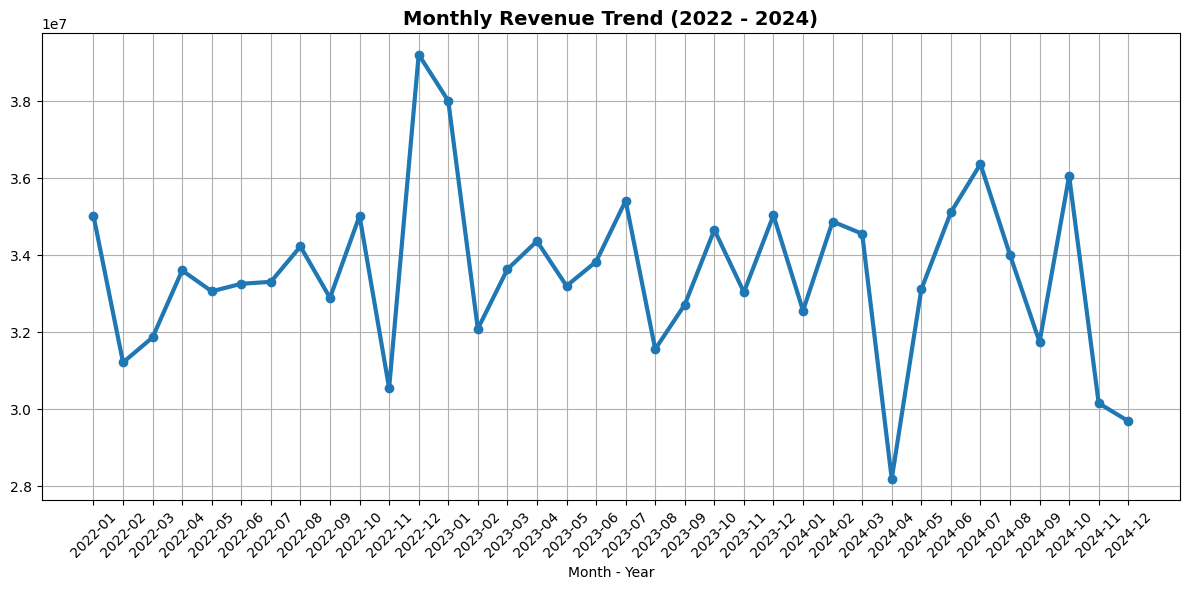

In [29]:
## Plot Monthly Revenue Trend

plt.figure(figsize=(12,6))
plt.plot(monthly_revenue.index, monthly_revenue.values, linewidth = 3, marker = "o")
plt.title("Monthly Revenue Trend (2022 - 2024)", fontsize = 14, fontweight = "bold")
plt.xlabel("Month - Year")
plt.xticks (rotation = 45)
plt.grid(True)
plt.tight_layout()
plt.show() 

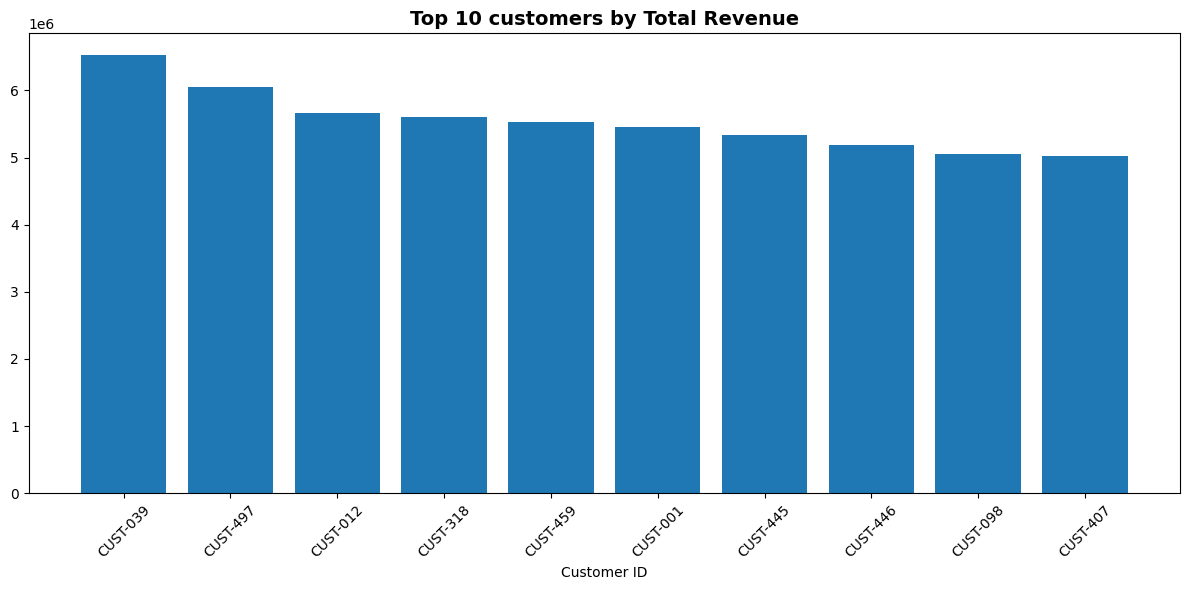

In [31]:
## Plot Top Highest Revenue Customers

top_customers = data.groupby("Customer_ID")["Amount"].sum().sort_values(ascending = False).head(10)

plt.figure(figsize = (12,6))
plt.bar(top_customers.index.astype(str), top_customers.values)
plt.title("Top 10 customers by Total Revenue", fontsize = 14, fontweight = "bold")
plt.xlabel("Customer ID")
plt.xticks(rotation = 45)
plt.tight_layout() 
plt.show() 

<function matplotlib.pyplot.show(close=None, block=None)>

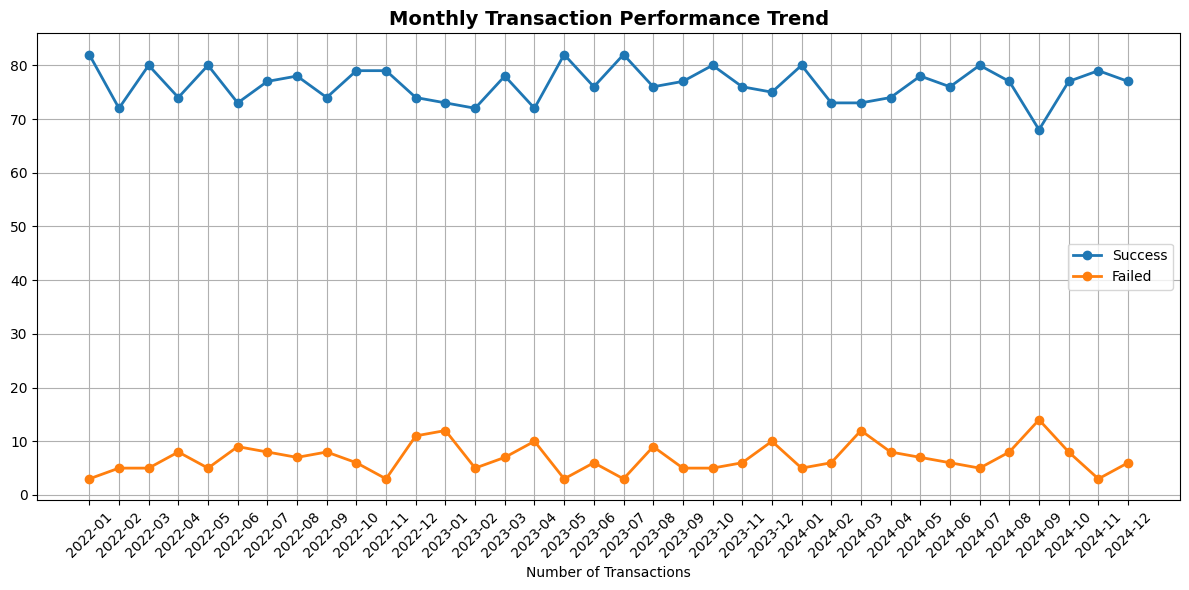

In [32]:
# Monthly Transaction Count Trend (Success vs Failed) 

monthly_status = data.groupby(["Month_Year", "Status"])["Transaction_ID"].count().unstack()

plt.figure(figsize = (12,6))
plt.plot(monthly_status.index, monthly_status["Success"], marker = "o", linewidth = 2, label = "Success")
plt.plot(monthly_status.index, monthly_status["Failed"], marker = "o", linewidth = 2, label = "Failed")
plt.title("Monthly Transaction Performance Trend", fontsize = 14, fontweight = "bold")
plt.xlabel("Number of Transactions")
plt.xticks(rotation = 45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show 

# Key Insights & Business Recommendations


1️⃣ Revenue Performance

	•	Nigeria contributed the highest revenue across all channels.
	•	Total revenue: ₦1.21 billion
	•	High-value customers like Cust_039 should be prioritized for retention.

2️⃣ Transaction Success Rate

	•	Overall success rate: 91%
	•	Failed transactions: 9%, mostly from USSD and Agent channels.

3️⃣ Monthly Trends

	•	Transaction performance improved through the year.
	•	September 2024 shows a major spike in failed transactions → indicates possible downtime or network issues that should be investigated.

4️⃣ Channel Behavior

	•	USSD dominates in transaction volume but has the highest failures.
	•	Recommend service optimization for USSD and Agent channels.

# Business Recommendation

* Stabilize USSD infrastructure + proactive monitoring to reduce downtime → this will directly increase revenue and customer satisfaction. 
  